<!DOCTYPE html>
<html lang="pt-BR">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 20px;
            background-color: #f0f0f0;
        }
        h1 {
            text-align: center;
            font-size: 2.5em;
            margin-bottom: 20px;
        }
        h2 {
            margin-top: 40px;
        }
        ul {
            list-style-type: none;
            padding: 0;
        }
        li {
            margin: 10px 0;
        }
        a {
            text-decoration: none;
            color: #007BFF;
        }
        a:hover {
            text-decoration: underline;
        }
    </style>
</head>
<body>
    <h1>Análise de Dados no Mercado Imobiliário 🏙️ </h1>
    <ul>


# Sumário

## 1. Importação de Bibliotecas
- Importar as bibliotecas necessárias para a análise de dados e visualização.

## 2. Exploração Inicial dos Dados
- Carregar os dados.
- Exibir as primeiras linhas do DataFrame.
- Obter informações gerais sobre os dados.
- Descrever as estatísticas básicas das variáveis.


<h2 id="importacao-bibliotecas">1. Importação de Bibliotecas Python</h2>

In [39]:
# -----------------------
# Manipulação de Dados
# -----------------------
import numpy as np  # Cálculos numéricos.
import pandas as pd  # Manipulação de tabelas.
pd.set_option('display.max_columns', None)  # Exibir todas as colunas.

# -----------------------
# Visualização de Dados
# -----------------------
import matplotlib.pyplot as plt  # Gráficos.
import seaborn as sns  # Visualizações estatísticas.

# -----------------------
# Dados Geoespaciais
# -----------------------
import geopandas as gpd  # Dados geoespaciais.

# -----------------------
# Configurações
# -----------------------
import warnings  # Gerenciar avisos.
warnings.filterwarnings("ignore")  # Ignorar avisos.

# -----------------------
# Manipulação de Imagens
# -----------------------
from PIL import Image  # Trabalhar com imagens.

# -----------------------
# Interatividade em Gráficos
# -----------------------
import mplcursors  # Interatividade em gráficos.

# -----------------------
# Mapas Interativos
# -----------------------
import folium  # Criar mapas interativos.


### Importando arquivo xlsx

In [40]:
df = pd.read_excel('../arquivo/base_imoveis.xlsx')

## Análise Exploratória

In [41]:
# Exibe as primeiras linhas do dataset.
df.head()

,id,valor_total,unit,area_util,quartos,vagas,condominio,suites,banheiros,piscina,academia,quadra,endereco,link,bairro,media_bairro,qtd_dados_bairro,media_idh,media_gini,expectativa_vida,renda_percapita,estacao_prox,linha_prox,dist,lat,lon
0,526,189900,5934.38,32,2,1,180.0,0,1,0,1,0,"Rua Juá Mirim, 300 - Cidade Tiradentes, São Pa...",https://www.vivareal.com.br/imovel/apartamento...,JOSE BONIFACIO,4621.488333,36.0,0.697182,0.410909,72.751818,559.668182,SÃO MATEUS,PRATA,6822.823684,-23.583879,-46.417548
1,734,221110,5142.09,43,2,1,250.0,0,1,0,0,1,"Rua Luís Mateus, 100 - Guaianases, São Paulo - SP",https://www.vivareal.com.br/imovel/apartamento...,JOSE BONIFACIO,4621.488333,36.0,0.697182,0.410909,72.751818,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4682.709841,-23.543535,-46.425492
2,738,219990,5116.05,43,1,1,300.0,0,1,1,0,0,"Estrada Itaquera-Guaianases, 2001 - Guaianases...",https://www.vivareal.com.br/imovel/apartamento...,JOSE BONIFACIO,4621.488333,36.0,0.697182,0.410909,72.751818,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.311123,-23.537339,-46.426823
3,753,219990,5116.05,43,2,1,300.0,0,1,1,0,0,"Estrada Itaquera-Guaianases, 2001 - Guaianases...",https://www.vivareal.com.br/imovel/apartamento...,JOSE BONIFACIO,4621.488333,36.0,0.697182,0.410909,72.751818,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.311123,-23.537339,-46.426823
4,924,220000,5365.85,41,2,1,300.0,0,1,1,1,1,"Rua Ioneji Matsubayashi, 10 - Itaquera, São Pa...",https://www.vivareal.com.br/imovel/apartamento...,JOSE BONIFACIO,4621.488333,36.0,0.697182,0.410909,72.751818,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,3313.918703,-23.557799,-46.443523


In [42]:
# Informa sobre a quantidade de linhas e colunas do dataset.
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset possui 2499 linhas e 26 colunas.


In [43]:
# Exibe o nome das colunas do dataset.
df.columns

Index(['id', 'valor_total', 'unit', 'area_util', 'quartos', 'vagas',
       'condominio', 'suites', 'banheiros', 'piscina', 'academia', 'quadra',
       'endereco', 'link', 'bairro', 'media_bairro', 'qtd_dados_bairro',
       'media_idh', 'media_gini', 'expectativa_vida', 'renda_percapita',
       'estacao_prox', 'linha_prox', 'dist', 'lat', 'lon'],
      dtype='object')

In [44]:
# Exibe a quantidade de valores unicos para cada variavel.
df.nunique()

id                  2499
valor_total          788
unit                1787
area_util            189
quartos                5
vagas                  8
condominio           531
suites                 5
banheiros              8
piscina                2
academia               2
quadra                 2
endereco            1778
link                2498
bairro                89
media_bairro          87
qtd_dados_bairro      34
media_idh             88
media_gini            86
expectativa_vida      89
renda_percapita       89
estacao_prox          79
linha_prox             6
dist                1729
lat                 1729
lon                 1729
dtype: int64

In [45]:
# Exibe informacoes sobre as variaveis.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2499 non-null   int64  
 1   valor_total       2499 non-null   int64  
 2   unit              2499 non-null   float64
 3   area_util         2499 non-null   int64  
 4   quartos           2499 non-null   int64  
 5   vagas             2499 non-null   int64  
 6   condominio        2264 non-null   float64
 7   suites            2499 non-null   int64  
 8   banheiros         2499 non-null   int64  
 9   piscina           2499 non-null   int64  
 10  academia          2499 non-null   int64  
 11  quadra            2499 non-null   int64  
 12  endereco          2499 non-null   object 
 13  link              2499 non-null   object 
 14  bairro            2499 non-null   object 
 15  media_bairro      2492 non-null   float64
 16  qtd_dados_bairro  2492 non-null   float64


In [46]:
# Exibe as estatisticas descritivas das variaveis numericas.
df.describe().round(2)

,id,valor_total,unit,area_util,quartos,vagas,condominio,suites,banheiros,piscina,academia,quadra,media_bairro,qtd_dados_bairro,media_idh,media_gini,expectativa_vida,renda_percapita,dist,lat,lon
count,2499.00,2499.00,2499.00,2499.00,2499.00,2499.00,2264.00,2499.00,2499.00,2499.00,2499.00,2499.00,2492.00,2492.00,2499.00,2499.00,2499.00,2499.00,2499.00,2499.00,2499.00
mean,1290.48,548085.20,7144.40,71.32,2.28,1.23,1720.33,0.65,1.74,0.37,0.17,0.31,7051.06,21.93,0.79,0.45,77.04,1583.84,2850.63,-23.56,-46.62
std,740.95,554448.72,2885.56,44.76,0.63,1.08,28048.55,0.81,1.02,0.48,0.37,0.46,2090.46,9.75,0.06,0.04,2.27,1108.71,2740.54,0.07,0.10
min,1.00,80000.00,1068.18,22.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,3078.94,1.00,0.69,0.37,72.41,522.52,31.32,-23.88,-46.81
25%,649.50,265000.00,5087.72,49.00,2.00,1.00,350.00,0.00,1.00,0.00,0.00,0.00,5316.70,15.00,0.75,0.43,75.38,863.32,926.38,-23.60,-46.69
50%,1292.00,380000.00,6491.23,60.00,2.00,1.00,486.00,0.00,1.00,0.00,0.00,0.00,6679.87,21.00,0.79,0.45,77.18,1243.47,2030.33,-23.55,-46.63
75%,1932.50,598500.00,8487.71,74.00,3.00,1.00,650.00,1.00,2.00,1.00,0.00,1.00,8088.42,28.00,0.83,0.48,78.44,1788.62,3844.25,-23.51,-46.54
max,2570.00,12000000.00,18750.00,640.00,5.00,39.00,857000.00,4.00,8.00,1.00,1.00,1.00,13377.90,51.00,0.94,0.59,81.95,6721.23,26101.13,-23.40,-46.38


In [47]:
# Exibe o somatorio da quantidade de dados ausentes.
df.isnull().sum()

id                    0
valor_total           0
unit                  0
area_util             0
quartos               0
vagas                 0
condominio          235
suites                0
banheiros             0
piscina               0
academia              0
quadra                0
endereco              0
link                  0
bairro                0
media_bairro          7
qtd_dados_bairro      7
media_idh             0
media_gini            0
expectativa_vida      0
renda_percapita       0
estacao_prox          0
linha_prox            0
dist                  0
lat                   0
lon                   0
dtype: int64

In [48]:
# Exibe os dados ausentes em porcentagem.
print("Porcentagem de dados faltantes:")
(df.isnull().sum() / len(df)* 100).apply(lambda x: f'{x:.4f}%')

Porcentagem de dados faltantes:


id                  0.0000%
valor_total         0.0000%
unit                0.0000%
area_util           0.0000%
quartos             0.0000%
vagas               0.0000%
condominio          9.4038%
suites              0.0000%
banheiros           0.0000%
piscina             0.0000%
academia            0.0000%
quadra              0.0000%
endereco            0.0000%
link                0.0000%
bairro              0.0000%
media_bairro        0.2801%
qtd_dados_bairro    0.2801%
media_idh           0.0000%
media_gini          0.0000%
expectativa_vida    0.0000%
renda_percapita     0.0000%
estacao_prox        0.0000%
linha_prox          0.0000%
dist                0.0000%
lat                 0.0000%
lon                 0.0000%
dtype: object

In [66]:
df['estacao_prox'].value_counts().head(5)

estacao_prox
CORINTHIANS-ITAQUERA     272
PALMEIRAS-BARRA FUNDA    211
LARGO TREZE              134
TUCURUVI                 128
SÃO PAULO-MORUMBI        114
Name: count, dtype: int64

In [71]:
moda_vagas = df['vagas'].mode()
print(f'A maioria dos imóveis possui {moda_vagas[0]} vaga.')

A maioria dos imóveis possui 1 vaga.


#### Renda Per Capita (eixo X): Refere-se à média de renda de cada indivíduo em determinada área, expressa em valores monetários. Regiões com renda per capita mais alta tendem a ter maior poder aquisitivo e, portanto, melhores condições de vida.
##### Índice de Desenvolvimento Humano (IDH) (eixo Y): O IDH é uma medida composta que avalia o desenvolvimento de uma região em três dimensões principais: longevidade (expectativa de vida), educação e padrão de vida (medido pela renda per capita). O IDH varia de 0 a 1, sendo que valores mais próximos de 1 indicam melhores condições de desenvolvimento humano.
#### Este gráfico ajuda a visualizar como o desenvolvimento humano de uma região está relacionado com o seu nível de renda.

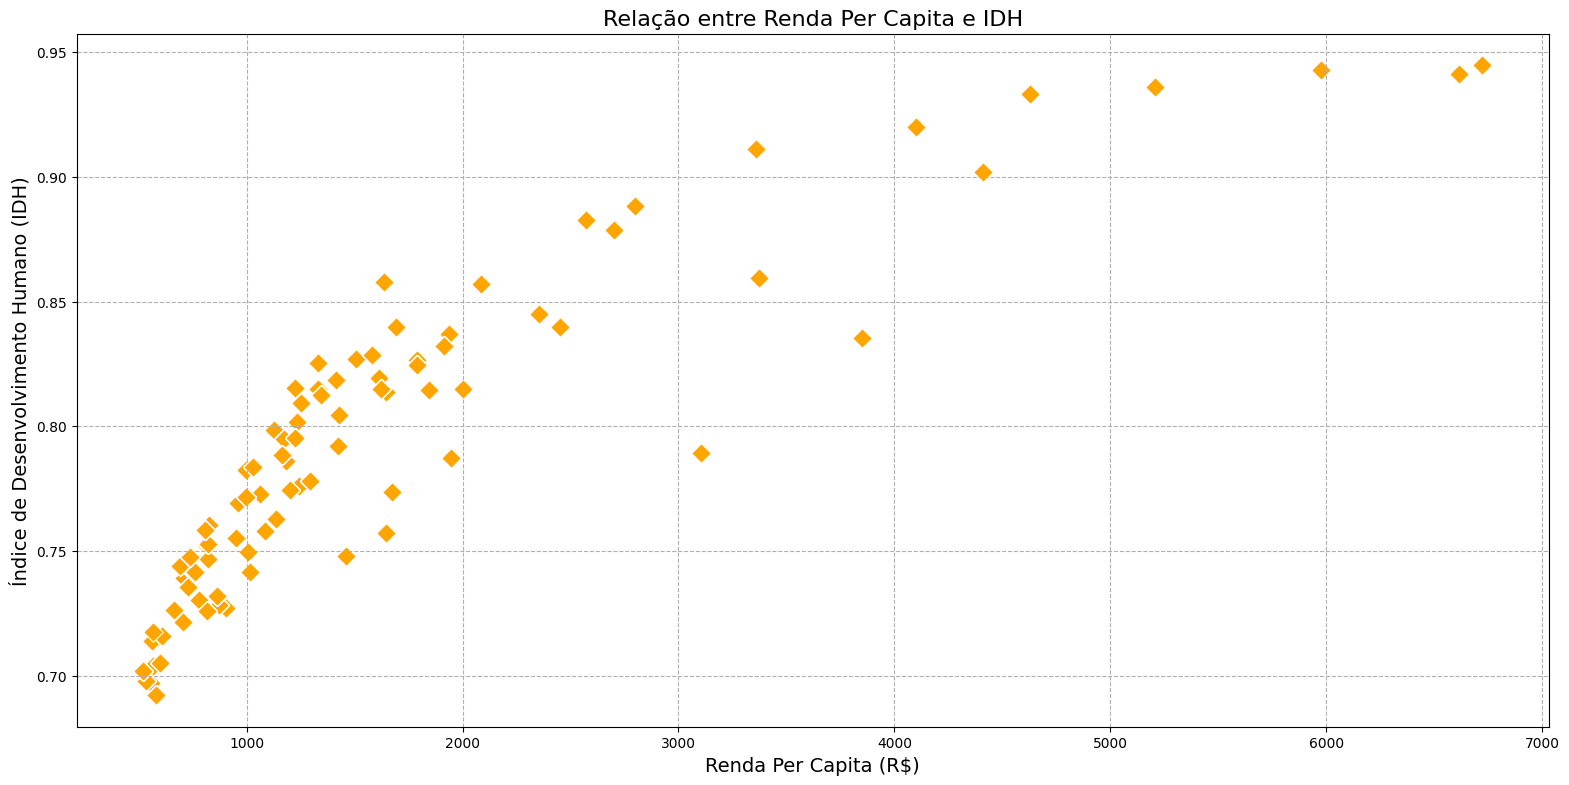

In [49]:
#Gráfico de dispersão para avaliar a correlação entre renda per capita e IDH.
plt.figure(figsize=(19, 9))
sns.scatterplot(x='renda_percapita', y='media_idh', data=df, color='orange', s=100, marker='D')
plt.title('Relação entre Renda Per Capita e IDH', fontsize=16)
plt.xlabel('Renda Per Capita (R$)', fontsize=14)
plt.ylabel('Índice de Desenvolvimento Humano (IDH)', fontsize=14)
plt.grid(True, linestyle='--')
plt.show()

#### Distância até o Metrô (eixo X): Representa a distância, em metros, de cada imóvel até a estação de metrô mais próxima. Imóveis com menor valor no eixo X estão mais próximos de uma estação de metrô, enquanto os valores maiores indicam imóveis mais distantes.
#### Valor Total (eixo Y): Mostra o valor total do imóvel em reais (R$). Este valor inclui o preço de mercado do imóvel, e imóveis mais caros aparecerão na parte superior do gráfico.

#### Este gráfico ajuda a visualizar como a proximidade ao metrô afeta o valor dos imóveis. Em áreas urbanas, a presença de transporte público eficiente é um fator de valorização dos imóveis, especialmente em grandes cidades como São Paulo. A análise deste gráfico pode ser valiosa para construtoras, imobiliárias e investidores, que podem buscar oportunidades de valorização em áreas com acesso ao transporte público, bem como para compradores interessados em imóveis com boa acessibilidade.


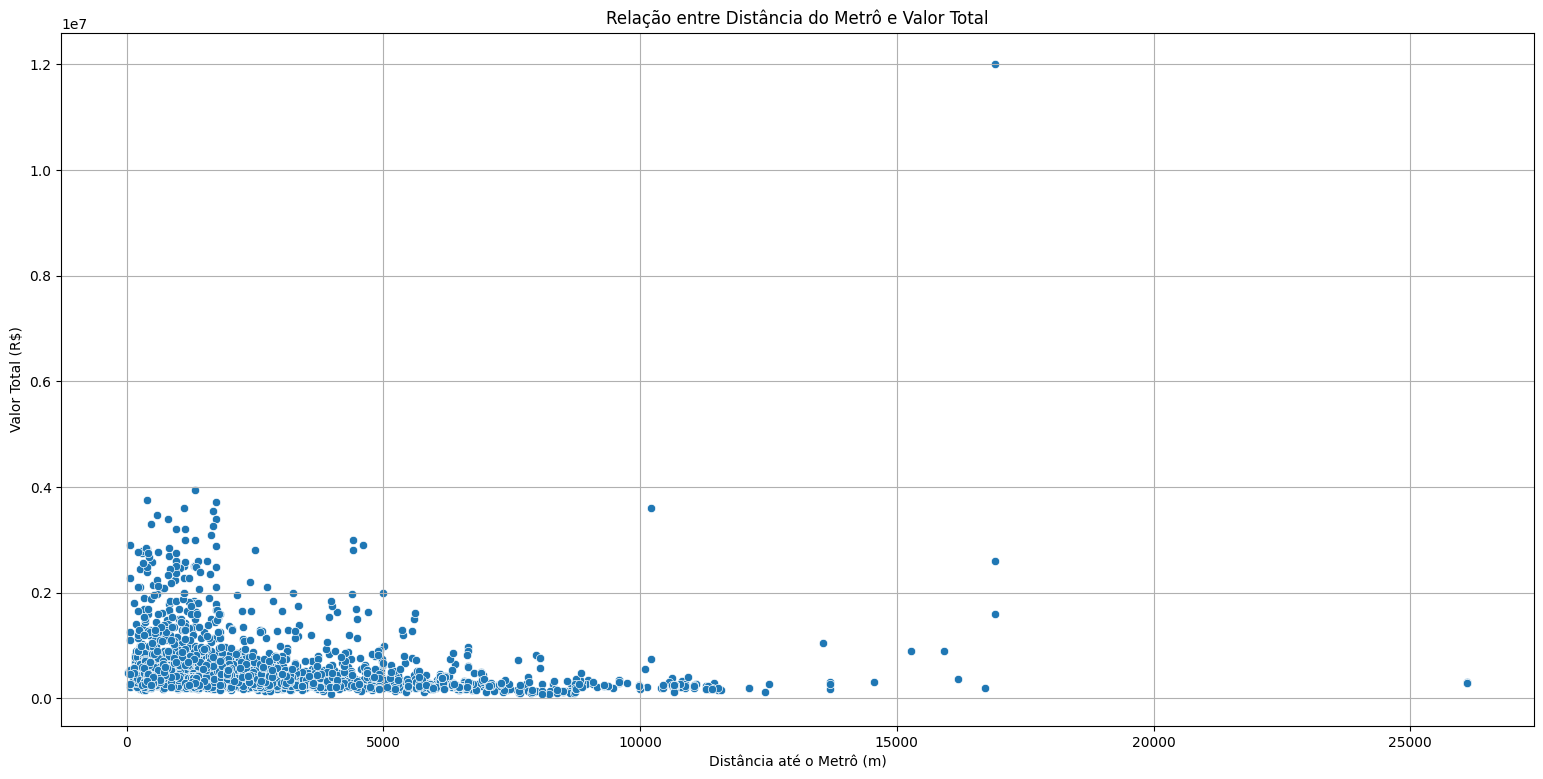

In [50]:
# 6. Gráfico de dispersão para avaliar a correlação entre distância do metrô e valor total
plt.figure(figsize=(19, 9))
sns.scatterplot(x='dist', y='valor_total', data=df)
plt.title('Relação entre Distância do Metrô e Valor Total')
plt.xlabel('Distância até o Metrô (m)')
plt.ylabel('Valor Total (R$)')
plt.grid(True)
plt.show()

##### Histograma de Quartos (lado esquerdo):
#### O histograma da variável "quartos" mostra a distribuição do número de quartos nos imóveis. Ele nos ajuda a entender quantos imóveis possuem uma determinada quantidade de quartos.
#### A curva KDE (Kernel Density Estimation) adicionada ao gráfico suaviza a distribuição dos dados, facilitando a visualização da tendência geral.
#### Dependendo dos dados, pode-se observar uma concentração em torno de 2 ou 3 quartos, que são comuns em apartamentos e casas de tamanho médio.

#### Histograma de Banheiros (lado direito):
#### Da mesma forma, o histograma da variável "banheiros" exibe a distribuição do número de banheiros presentes nos imóveis.
#### A curva KDE também está presente, proporcionando uma visão mais fluida da distribuição.
#### Em muitos casos, pode-se observar que a maioria dos imóveis têm entre 1 e 2 banheiros, o que é típico de muitos apartamentos e casas menores. Imóveis maiores e de luxo podem ter mais banheiros, aparecendo nas barras à direita do gráfico.
#### Este gráfico é útil para entender a configuração padrão dos imóveis em termos de quartos e banheiros. Ao observar a distribuição, compradores e investidores podem ajustar suas expectativas de acordo com o mercado, enquanto corretores podem usar essas informações para destacar imóveis que se diferenciam da maioria, como aqueles com mais quartos ou banheiros do que o usual. Além disso, o gráfico também é útil para construtoras ao projetar novos empreendimentos com base na demanda por diferentes configurações de imóveis.


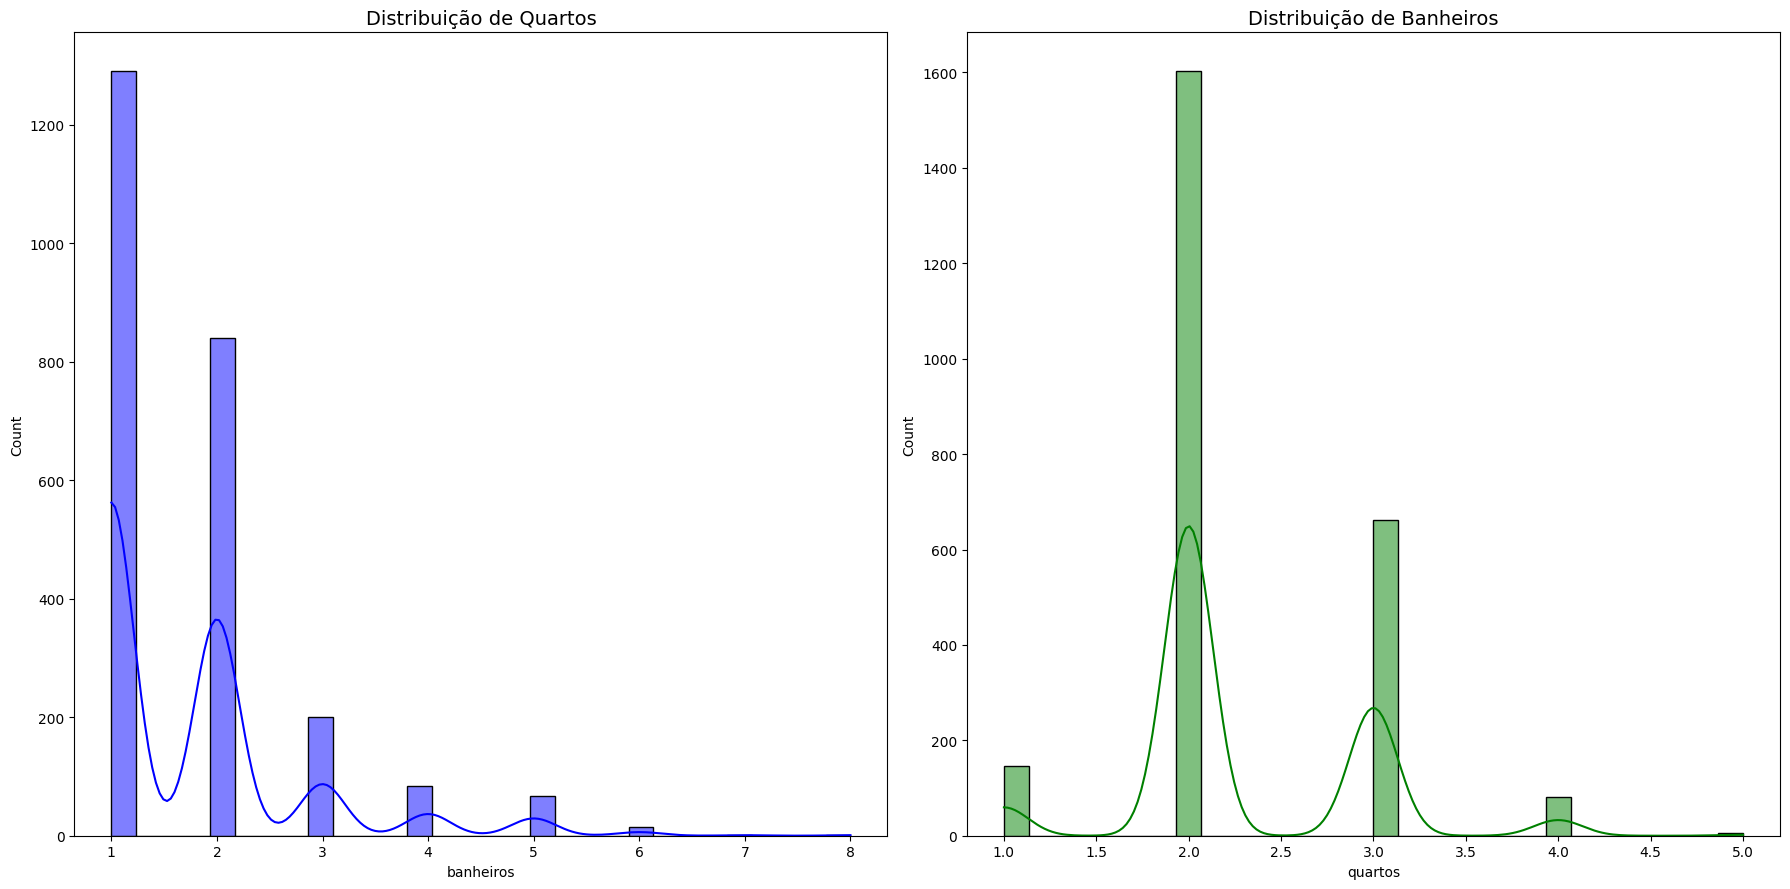

In [51]:
# Definindo o tamanho da figura
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

# Plotando histogramas para cada variável em um subplot separado
sns.histplot(df["banheiros"], kde=True, color='blue', bins=30, ax=axs[0])
sns.histplot(df["quartos"], kde=True, color='green', bins=30, ax=axs[1])

# Adicionando título para cada subplot
axs[0].set_title("Distribuição de Quartos", fontsize=14)
axs[1].set_title("Distribuição de Banheiros", fontsize=14)


# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

#### Este gráfico de regressão múltiplo é para entender os fatores que influenciam o valor total de um imóvel. Ele permite que se identifiquem quais variáveis têm uma relação mais forte com o preço do imóvel, fornecendo insights valiosos para construtoras, investidores, e compradores. Por exemplo, se a área útil e o número de vagas apresentarem uma correlação forte com o valor total, isso pode indicar que esses fatores são cruciais na determinação do preço, enquanto outras variáveis podem ter uma influência menor.


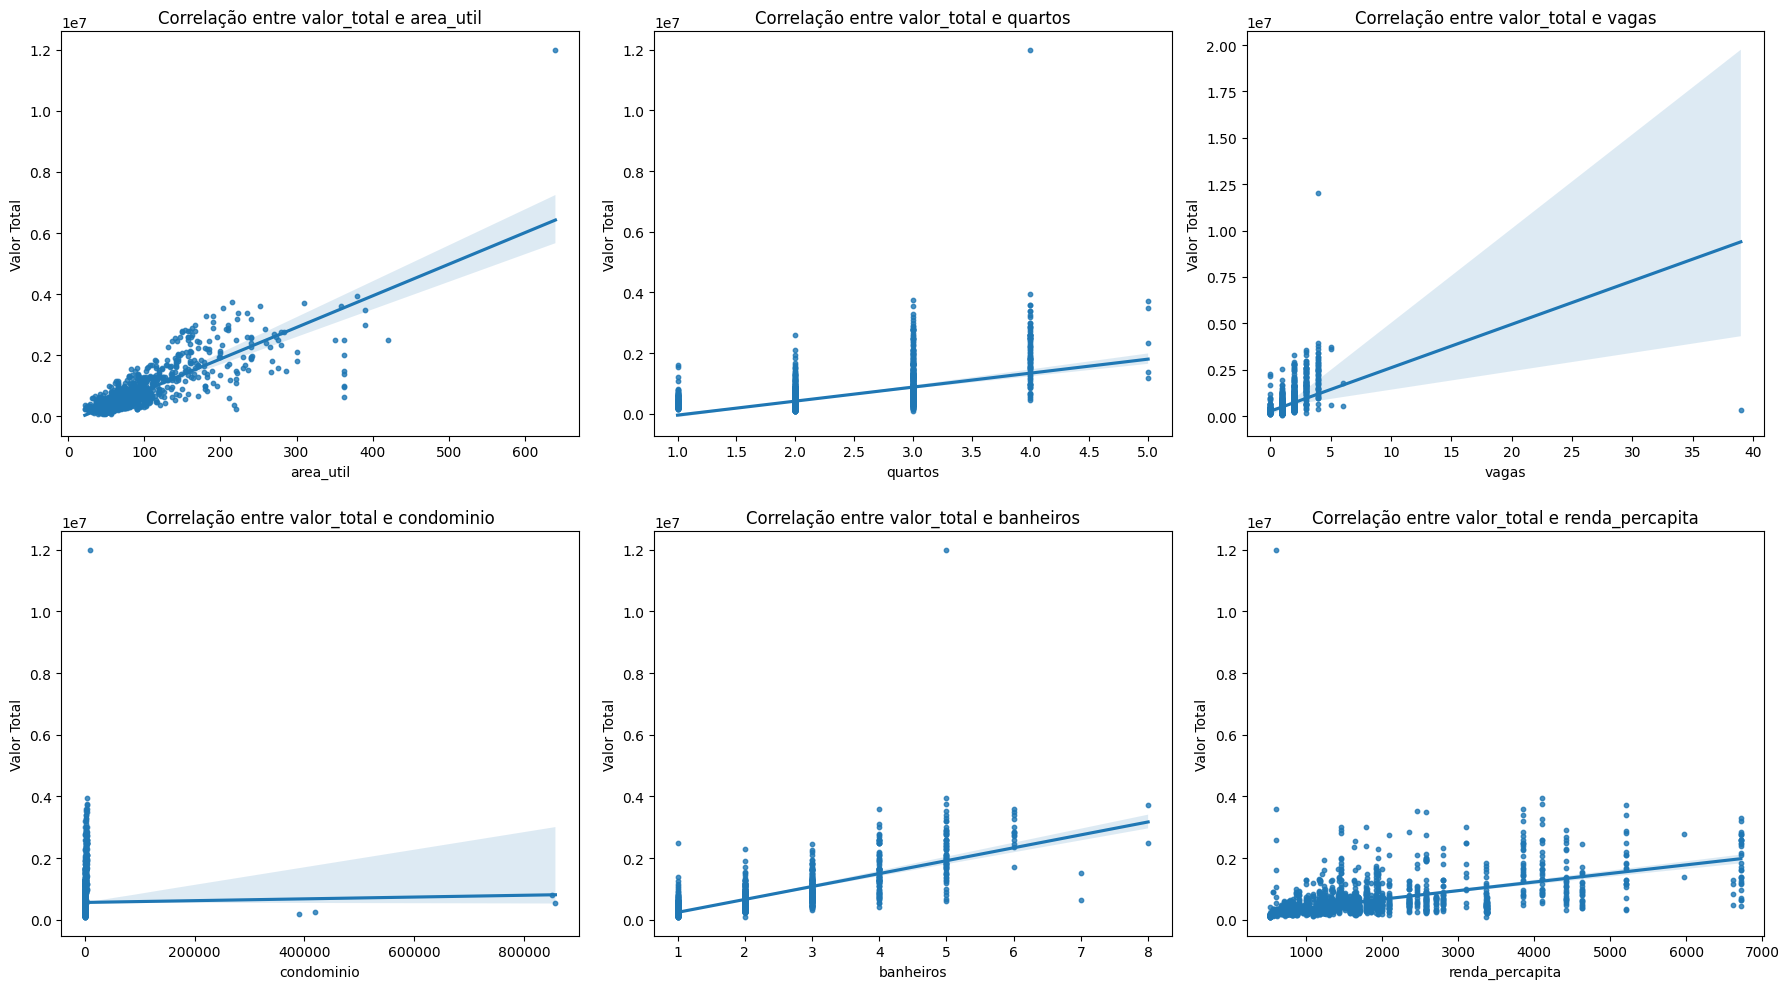

In [52]:
# Selecao das variaveis a serem exibidas
var = ['area_util', 'quartos', 'vagas', 'condominio', 'banheiros', 'renda_percapita']


# Configuracao dos subplots
n_variaveis = len(var)
n_linhas = (n_variaveis + 2) // 3

# Configuracao do tamanho dos subplots
fig, axs = plt.subplots(n_linhas, 3, figsize=(18, n_linhas * 5))


# Ajuste e configuracao do visual dos subplots e grafico de regressao.
for i, var in enumerate(var):
    linha = i // 3
    coluna = i % 3
    sns.regplot(x=var, y='valor_total', data=df, ax=axs[linha, coluna], scatter_kws={'s': 10})
    axs[linha, coluna].set_title(f'Correlação entre valor_total e {var}')
    axs[linha, coluna].set_ylabel('Valor Total')
    axs[linha, coluna].set_xlabel(var)

# Remove subplots vazios
for j in range(i+1, n_linhas * 3):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

#### Área Útil:
#### O histograma para área útil mostra a distribuição da quantidade de metros quadrados dos imóveis. Em muitos casos, espera-se uma maior concentração de imóveis com uma área útil em torno de 50 a 100 m², o que é comum em apartamentos e casas urbanas.
#### A curva KDE nos ajuda a visualizar a densidade da distribuição e identificar se a maioria dos imóveis está concentrada em uma determinada faixa de área.
#### Valor do Condomínio:
#### O histograma do valor do condomínio exibe a variação dos custos mensais de condomínio para diferentes imóveis. Valores de condomínio mais baixos podem ser mais frequentes, especialmente em imóveis sem muitos serviços de luxo.
#### A distribuição assimétrica com picos na parte inferior sugere que a maioria dos imóveis possuem um valor de condomínio relativamente acessível, enquanto poucos imóveis têm valores muito altos, possivelmente associados a empreendimentos de alto padrão.
#### Renda Per Capita:
#### O histograma para renda per capita mostra a distribuição da média de renda em cada área ou bairro. Geralmente, espera-se que a renda tenha uma ampla faixa de variação, com maior concentração em valores médios, enquanto regiões com renda muito alta ou muito baixa aparecem menos frequentemente.
#### O KDE nos permite ver de forma clara as as áreas onde a maioria dos imóveis está localizada em termos de perfil de renda.

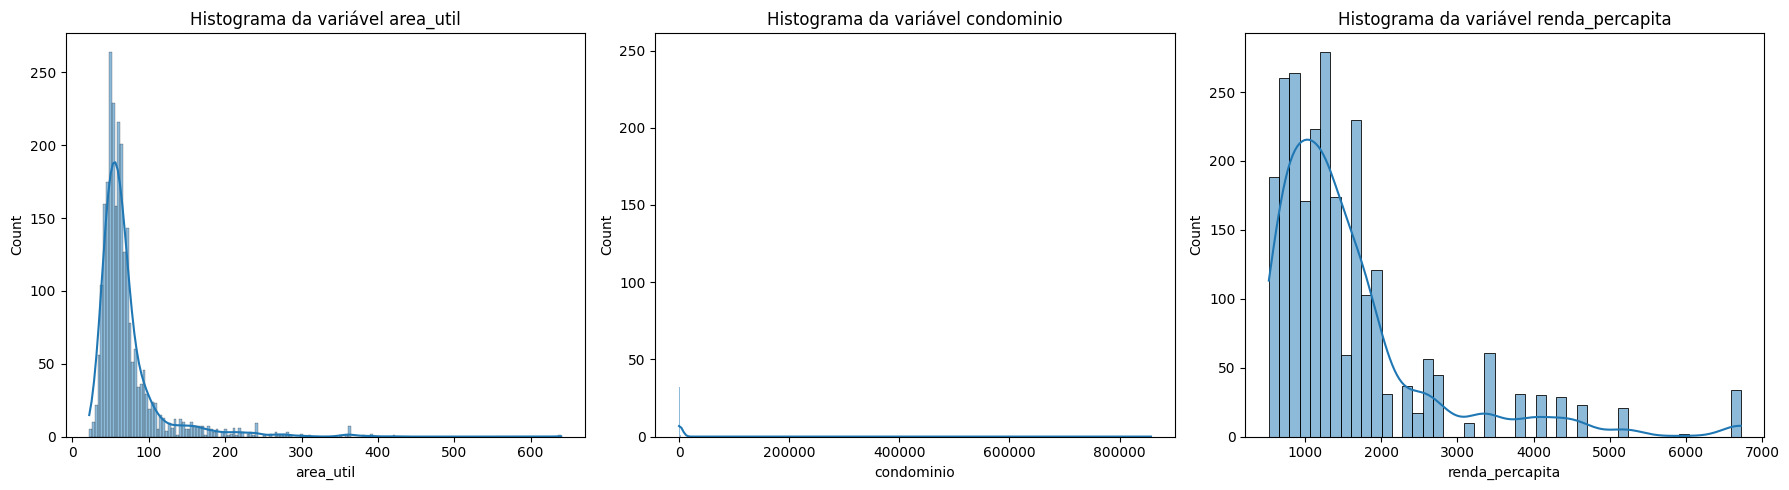

In [53]:
# Seleção das variáveis a serem exibidas
vars2 = ['area_util', 'condominio', 'renda_percapita']

# Configuração do tamanho do gráfico
plt.figure(figsize=(18, 5))

# Plotando histogramas para cada variável
for i, var in enumerate(vars2):
    plt.subplot(1, len(vars2), i + 1) 
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Histograma da variável {var}')
    plt.xlabel(var)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

#### Esses gráficos são úteis para identificar a frequência de amenidades como piscina, academia e quadra em imóveis. Essa informação pode ajudar compradores a encontrar imóveis com as características que desejam ou pode auxiliar construtoras a entender as 

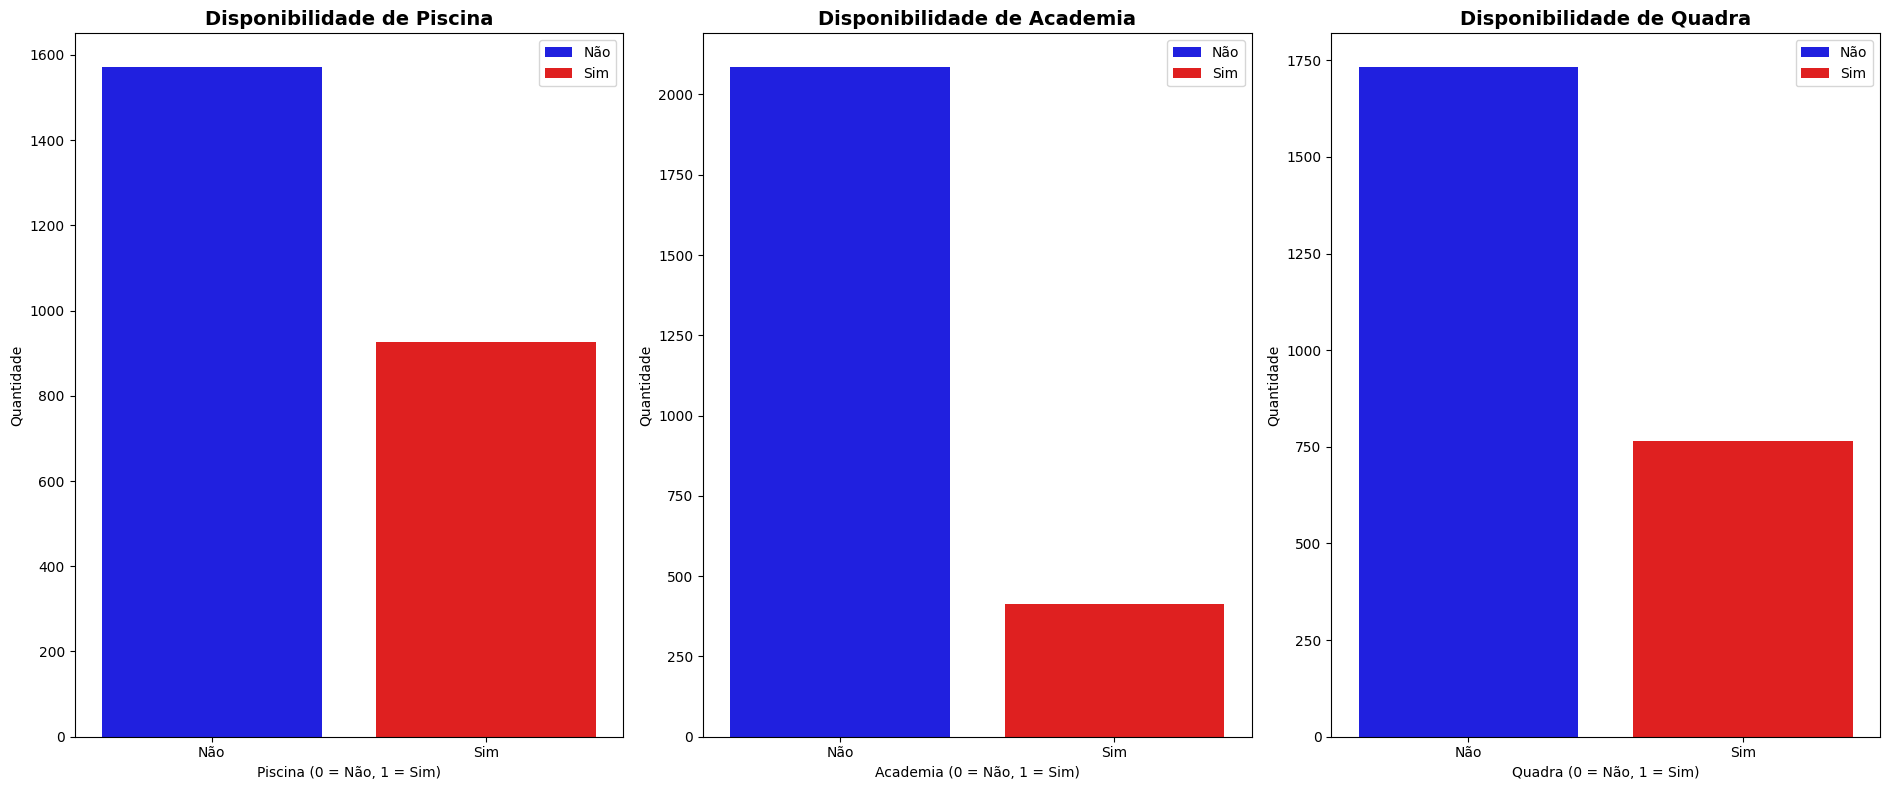

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(19, 8))

# Definir as cores
colors = ['blue', 'red']

# Gráfico para piscina
sns.countplot(x='piscina', data=df, ax=axs[0], palette=colors)
axs[0].set_title('Disponibilidade de Piscina', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Piscina (0 = Não, 1 = Sim)')
axs[0].set_ylabel('Quantidade')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Não', 'Sim'])
axs[0].legend(['Não', 'Sim'], loc='upper right')

# Gráfico para academia
sns.countplot(x='academia', data=df, ax=axs[1], palette=colors)
axs[1].set_title('Disponibilidade de Academia', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Academia (0 = Não, 1 = Sim)')
axs[1].set_ylabel('Quantidade')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Não', 'Sim'])
axs[1].legend(['Não', 'Sim'], loc='upper right')

# Gráfico para quadra
sns.countplot(x='quadra', data=df, ax=axs[2], palette=colors)
axs[2].set_title('Disponibilidade de Quadra', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Quadra (0 = Não, 1 = Sim)')
axs[2].set_ylabel('Quantidade')
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['Não', 'Sim'])
axs[2].legend(['Não', 'Sim'], loc='upper right')

# Ajustar layout
plt.tight_layout()
plt.show()

#### Média do Valor Total por Bairro:
#### O gráfico exibe a média do valor total dos imóveis para cada bairro, calculada a partir do conjunto de dados. Essa média permite comparar os bairros em termos de valor imobiliário, destacando os bairros mais caros e mais acessíveis.
#### A ordenação do gráfico do menor para o maior valor facilita a visualização dos bairros mais acessíveis na parte superior e dos mais caros na parte inferior.
#### Gradiente de Cores:
#### O gráfico utiliza um gradiente de azul, onde as barras com os valores mais baixos têm tons mais claros, e as barras com valores mais altos são mais escuras. Isso cria uma visualização mais agradável e intuitiva, ajudando a distinguir rapidamente as diferentes faixas de valor entre os bairros.


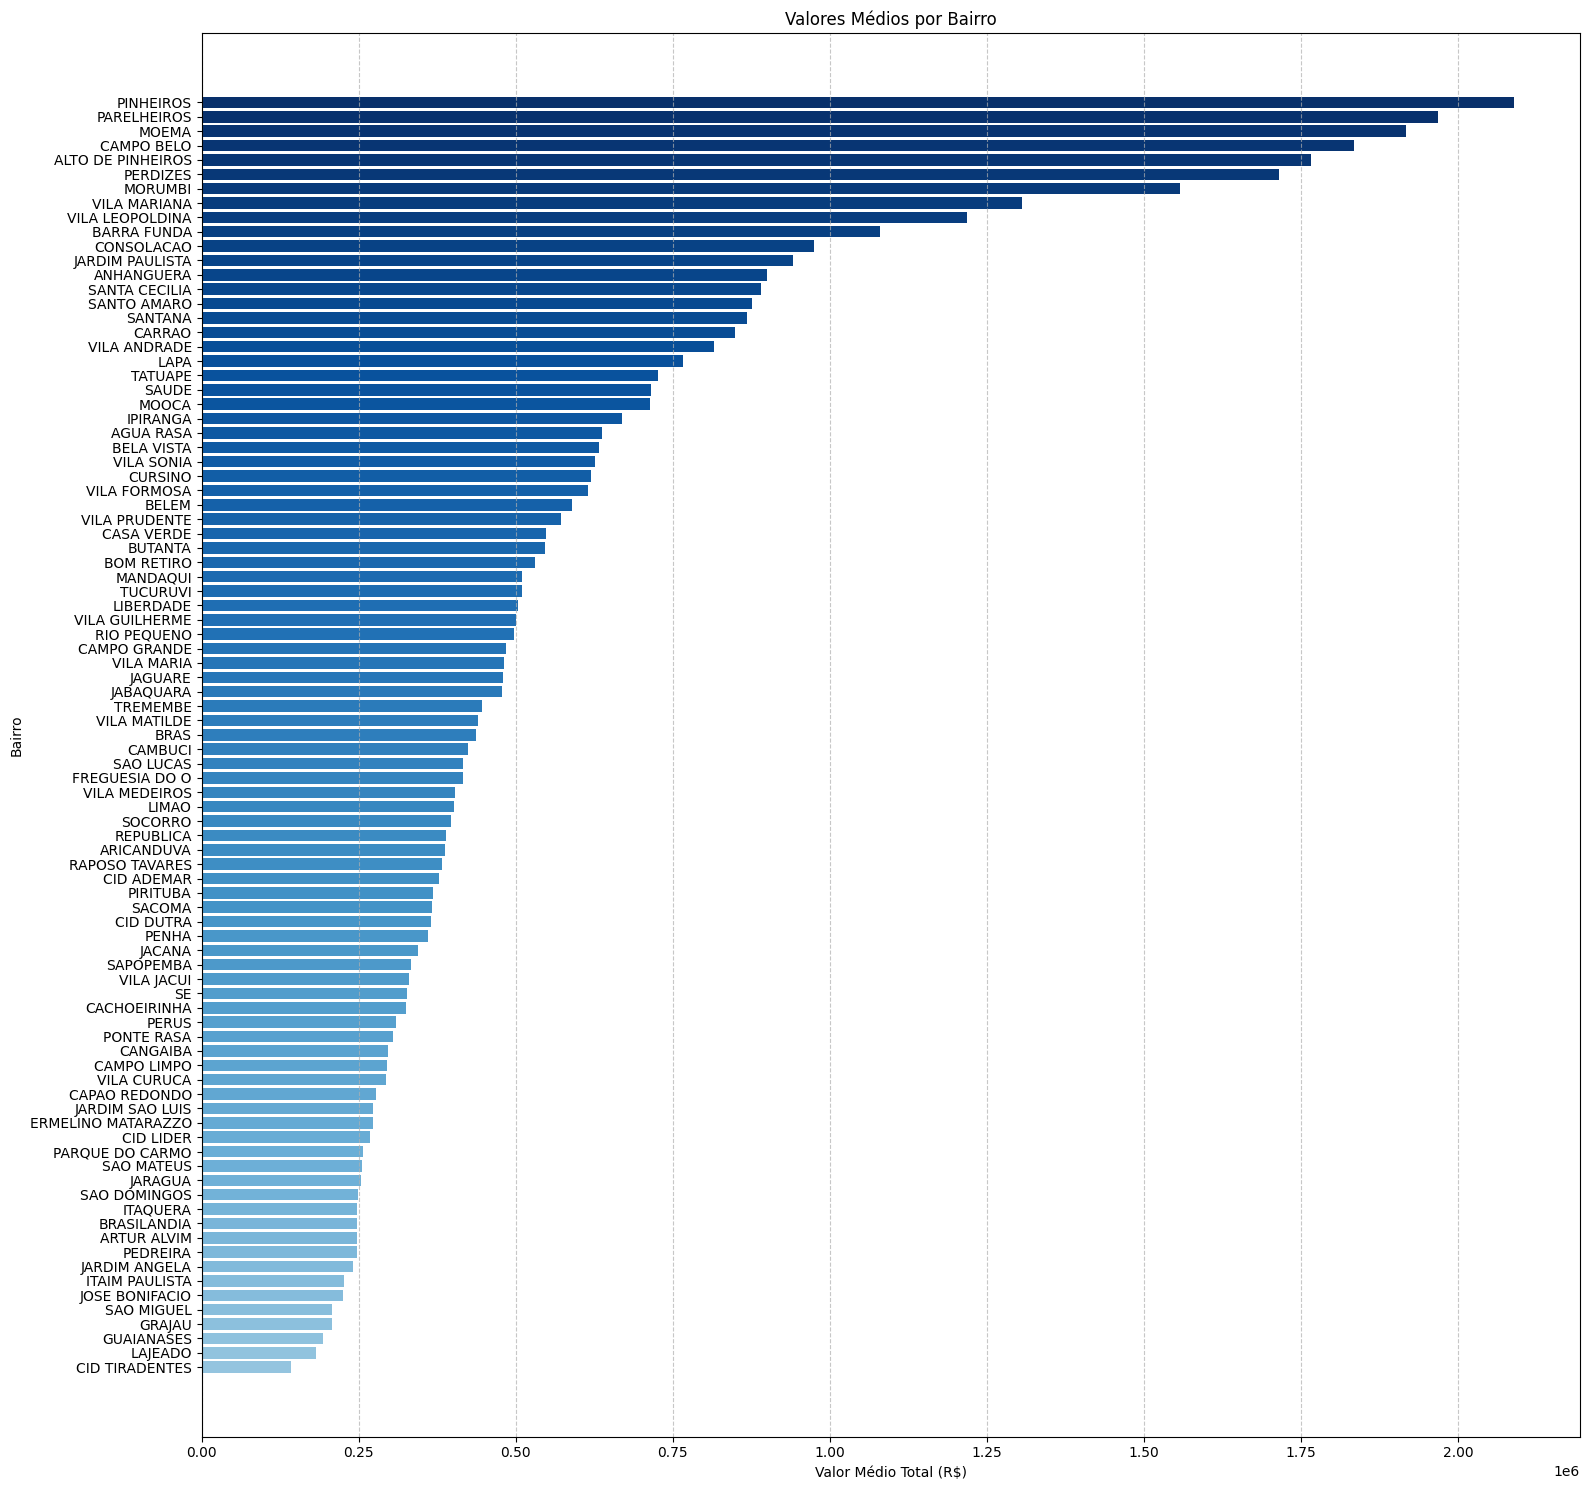

In [55]:
# Calcular a média do valor total por bairro e ordenar do maior para o menor
media_por_bairro = df.groupby('bairro')['valor_total'].mean().reset_index()
media_por_bairro = media_por_bairro.sort_values(by='valor_total', ascending=True)

# Definir cores com um gradiente
n = len(media_por_bairro)
colors = plt.cm.Blues(np.linspace(0.4, 1, n))  # Gradiente de azul

# Criar gráfico de barras
plt.figure(figsize=(16, 15))
bars = plt.barh(media_por_bairro['bairro'], media_por_bairro['valor_total'], color=colors)

# Adicionar título e rótulos
plt.title('Valores Médios por Bairro')
plt.xlabel('Valor Médio Total (R$)')
plt.ylabel('Bairro')

# Adicionar interatividade usando mplcursors
mplcursors.cursor(bars, hover=True).connect("add", lambda sel: sel.annotation.set_text(
    f'Bairro: {media_por_bairro["bairro"][sel.index]}\nValor Médio: R$ {media_por_bairro["valor_total"][sel.index]:,.2f}'
))

# Ajustar layout
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [56]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']))

# Criar um mapa centrado em São Paulo
mapa_sp = folium.Map(location=[-23.5505, -46.6333], zoom_start=12)

# Definir as faixas de renda e cores correspondentes
faixas = {
    'Menor que R$ 265.000': (0, 265000),
    'R$ 265.000 a R$ 380.000': (265000, 380000),
    'R$ 380.000 a R$ 598.500': (380000, 598500),
    'R$ 598.500 a R$ 1.000.000': (598500, 1000000),
    'Maior que R$ 1.000.000': (1000000, float('inf')),
}

cores = {
    'Menor que R$ 265.000': 'green',
    'R$ 265.000 a R$ 380.000': 'yellow',
    'R$ 380.000 a R$ 598.500': 'orange',
    'R$ 598.500 a R$ 1.000.000': 'red',
    'Maior que R$ 1.000.000': 'purple',
}

In [59]:
# Adicionar marcadores circulares ao mapa com faixas de renda
for index, row in gdf.iterrows():
    # Determinar a faixa de renda para o valor do imóvel
    faixa = None
    for faixa_nome, (min_valor, max_valor) in faixas.items():
        if min_valor <= row['valor_total'] < max_valor:
            faixa = faixa_nome
            break

    # Definir a cor correspondente à faixa de renda
    cor = cores[faixa]

    # Criar o texto do pop-up
    popup_text = f"""
    <div style="max-width: 200px; text-align: center; font-family: Arial, sans-serif;">
        <h3 style="color: #3498db; margin-bottom: 5px;">Imóvel à Venda</h3>
        <p style="margin-bottom: 5px;"><b>Valor Total:</b> R$ {row['valor_total']:,.2f}</p>
        <p style="margin-bottom: 5px;"><b>Bairro:</b> {row['bairro']}</p>
        <p style="margin-bottom: 5px;"><b>Quartos:</b> {row['quartos']}</p>
        <p style="margin-bottom: 5px;"><b>Estação Próxima:</b> {row['estacao_prox']}</p>
    </div>
    """

    # Adicionar um marcador circular ao mapa com o pop-up
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        popup=popup_text,
        radius=5,  # Tamanho do círculo
        color='black',  # Cor da borda
        fill=True,
        fill_color=cor,  # Cor de preenchimento baseada na faixa de renda
        fill_opacity=1,  # Opacidade do preenchimento
        weight=1  # Largura da borda
    ).add_to(mapa_sp)

# Adicionar uma legenda ao mapa com cores
legend_html = """
<div style="position: fixed; 
            bottom: 30px; left: 30px; width: 160px; height: auto; 
            background-color: white; 
            padding: 10px; z-index: 1000; 
            font-size: 14px;
            border:2px solid grey;">
     <b>Legenda</b><br>
     <i style="background: green; width: 20px; height: 20px; display: inline-block;"></i> Menor que R$ 265.000<br>
     <i style="background: yellow; width: 20px; height: 20px; display: inline-block;"></i> R$ 265.000 a R$ 380.000<br>
     <i style="background: orange; width: 20px; height: 20px; display: inline-block;"></i> R$ 380.000 a R$ 598.500<br>
     <i style="background: red; width: 20px; height: 20px; display: inline-block;"></i> R$ 598.500 a R$ 1.000.000<br>
     <i style="background: purple; width: 20px; height: 20px; display: inline-block;"></i> Maior que R$ 1.000.000<br>
</div>
"""
mapa_sp.get_root().html.add_child(folium.Element(legend_html))

#### Distribuição geográfica dos imóveis:
#### O código usa as coordenadas de latitude e longitude dos imóveis para plotá-los em um mapa interativo de São Paulo, permitindo que o usuário veja exatamente onde cada imóvel está localizado. Isso é fundamental para quem deseja entender a distribuição espacial dos imóveis, identificar bairros com mais oferta ou verificar a proximidade de determinados imóveis em relação a serviços, transporte público, etc.


## Aviso
### O GitHub não tem suporte para gráficos interativos, por isso tiramos um print para mostrar esse gráfico que é exibido normalmente na IDE.

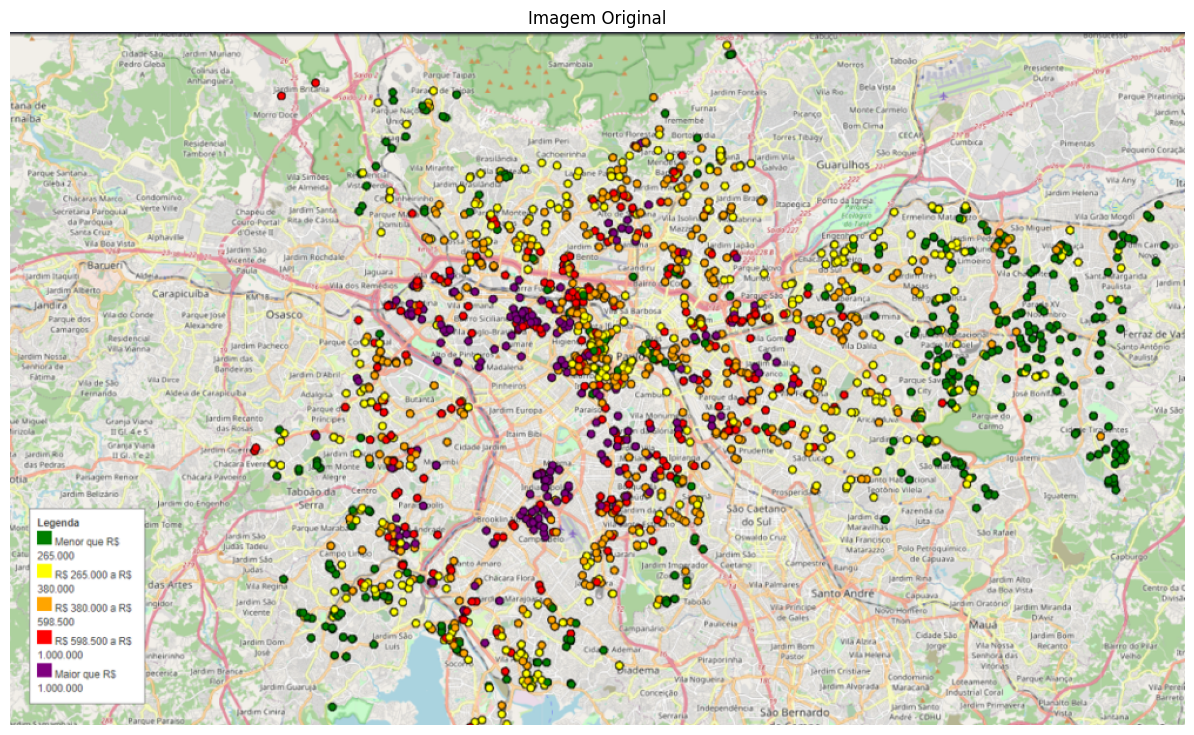

In [60]:
# Carregar a imagem com o caminho
image_path = r'C:\Users\flongarini\Documents\GitHub\mackenzie_projeto_aplicado\Imagens\image_resized.png'  
img = Image.open(image_path)

# Converter a imagem em um array numpy
img_array = np.array(img)

# Mostrar a imagem original
plt.figure(figsize=(19, 9))
plt.imshow(img_array)
plt.axis('off')  # Ocultar os eixos
plt.title('Imagem Original')
plt.show()
